In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import scipy as s
from scipy import stats
# import seaborn as sns
plt.rcParams['font.size'] = 18
#plt.rcParams['font.family'] = "serif"
tdir = 'in'
major = 5.0
minor = 3.0
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

In [2]:
def get_average_all_exps(result_dict, get_exps_min=False):
    
    multiexps = {}
    for k, runs in result_dict.items():
        #print(k)
        #for runs in precs_dict[k]:
        #print(runs)
        for ind, run in enumerate(runs):
            #print(run)
            try:
                if ind in multiexps.keys():
                    multiexps[ind].append(run)
                else:
                    multiexps[ind] = [run]
            except: continue


    exps_mean = []
    exps_min = []
    for exp in multiexps.keys():
        exps_mean.append(np.mean(multiexps[exp]))
        exps_min.append(np.min(multiexps[exp]))
        #print(np.mean(multiexps[exp]), np.std(multiexps[exp]))

    assert len(exps_mean) == len(exps_min)

    #print(f'Mean {np.mean(exps_mean)* 100:.2f}\u00B1{np.std(exps_mean)* 100:.2f}')
    #print(f'Min {np.mean(exps_min)* 100:.2f}\u00B1{np.std(exps_min)* 100:.2f}')
    
    if get_exps_min:
        return exps_mean, exps_min
    else:
        return exps_mean 
    
    
    
def V2_ifs_results(scenario, replay_config, ifs_option='ratio', joint=False,
                cnt_rate=0.1, anomaly_perct=0.5, memory_budget=1000):

    target_classes = 100
    
    results_dir = './Submission_Domain/'

    if replay_config == 'grs':
        if joint:
            result_file = str(replay_config)  + '_joint_results.txt'
        else:
            result_file = str(replay_config)  + '_' +\
                    str(memory_budget)  + '_results.txt'
    elif replay_config == 'ifs':
        result_file = 'ifs_' + str(ifs_option) + '_' + str(memory_budget) + '_results.txt'
    else:
        result_file = str(replay_config)  + '_' +\
                    str(memory_budget)  + '_results.txt'

        
    result_path = results_dir + result_file 
    print(result_path)
    
    accs_dict = {}
    precs_dict = {}
    recalls_dict = {}
    f1_dict = {}

    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:
                #print(line)
                infos = line.split('\t')
                task = infos[0]
                #print(int(task))
                acc, prec, recal, f1 = float(infos[1]), float(infos[2]), float(infos[3]), float(infos[4])

                if task in accs_dict.keys():
                    accs_dict[task].append(acc)
                    precs_dict[task].append(prec)
                    recalls_dict[task].append(recal)
                    f1_dict[task].append(f1)
                else:
                    accs_dict[task] = [acc]
                    precs_dict[task] = [prec]
                    recalls_dict[task] = [recal]
                    f1_dict[task] = [f1]

    #print(accs_dict)
    
    #accs_all_task = []
    accs_all = get_average_all_exps(accs_dict, get_exps_min=False)
    precs_all, precs_all_min = get_average_all_exps(precs_dict, get_exps_min=True)
    
    recalls_all =get_average_all_exps(recalls_dict, get_exps_min=False)
    f1_all = get_average_all_exps(f1_dict, get_exps_min=False)
    
    
    precs_all_task = []
    f1_all_task = []
    for k, v in precs_dict.items():
        precs_all_task.append(v)
        f1_all_task.append(f1_dict[k])
        

    #print()
    if replay_config == 'grs':
        if joint:
            print(f'\t\t {str(replay_config)}-Joint \n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
        else:
            print(f'\t\t {str(replay_config)}-{str(memory_budget)}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    if replay_config == 'ifs':
        print(f'\t\t {str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    
    print()
    return  np.array(precs_all_task), np.array(accs_all), np.array(precs_all), np.array(recalls_all), np.array(f1_all_task), np.array(f1_all)


def ifs_results(scenario, replay_config, ifs_option='ratio', joint=False, none=False,
                cnt_rate=0.1, anomaly_perct=0.5, min_samples=1, goodware_ifs=False, memory_budget=1000):

    #target_classes = 100
    
    results_dir = './Submission_Domain/'

    if replay_config == 'grs':
        if joint:
            result_file = str(replay_config)  + '_joint_results.txt'
        elif none:
            result_file = str(replay_config)  + '_none_results.txt'
        else:
            result_file = str(replay_config)  + '_' +\
                    str(memory_budget)  + '_results.txt'
        #print(result_file)
    
            
    elif replay_config == 'ifs':
        if goodware_ifs:
            if min_samples > 1:
                result_file = 'ifs_good_' + str(ifs_option) + '_' + str(min_samples) + '_' + str(memory_budget) + '_results.txt'
            else:
                result_file = 'ifs_good_' + str(ifs_option) + '_' + str(memory_budget) + '_results.txt'
        else:
            if min_samples > 1:
                result_file = 'ifs_' + str(ifs_option) + '_' + str(min_samples) + '_' + str(memory_budget) + '_results.txt'
            else:
                result_file = 'ifs_' + str(ifs_option) + '_' + str(memory_budget) + '_results.txt'

    elif replay_config == 'aws':
        if goodware_ifs:
            if min_samples > 1:
                result_file = 'aws_good_' + str(ifs_option) + '_' + str(min_samples) + '_' + str(memory_budget) + '_results.txt'
            else:
                result_file = 'aws_good_' + str(ifs_option) + '_' + str(memory_budget) + '_results.txt'
        else:
            if min_samples > 1:
                result_file = 'aws_' + str(ifs_option) + '_' + str(min_samples) + '_' + str(memory_budget) + '_results.txt'
            else:
                result_file = 'aws_' + str(ifs_option) + '_' + str(memory_budget) + '_results.txt'

        
    else:
        result_file = str(replay_config)  + '_' +\
                    str(memory_budget)  + '_results.txt'

        
    result_path = results_dir + result_file 
    #print(result_path)
    
    accs_dict = {}
    precs_dict = {}
    recalls_dict = {}
    f1_dict = {}

    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:
                #print(line)
                infos = line.split('\t')
                #print(infos)
                task = infos[0]
                #print(int(task))
                acc, prec, recal, f1 = float(infos[1]), float(infos[2]), float(infos[3]), float(infos[4])

                if task in accs_dict.keys():
                    accs_dict[task].append(acc)
                    precs_dict[task].append(prec)
                    recalls_dict[task].append(recal)
                    f1_dict[task].append(f1)
                else:
                    accs_dict[task] = [acc]
                    precs_dict[task] = [prec]
                    recalls_dict[task] = [recal]
                    f1_dict[task] = [f1]

    #print(accs_dict)
    
    #accs_all_task = []
    accs_all = get_average_all_exps(accs_dict, get_exps_min=False)
    precs_all, precs_all_min = get_average_all_exps(precs_dict, get_exps_min=True)
    
    recalls_all =get_average_all_exps(recalls_dict, get_exps_min=False)
    f1_all = get_average_all_exps(f1_dict, get_exps_min=False)
    
    
    precs_all_task = []
    f1_all_task = []
    for k, v in precs_dict.items():
        precs_all_task.append(v)
        f1_all_task.append(f1_dict[k])
        

    #print()
    if replay_config == 'grs':
        if joint:
            #print(f'\t\t {str(replay_config)}-Joint \n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
            print(f'\t\t {str(replay_config)}-Joint\tprec\t{np.mean(precs_all)* 100:.1f}$\pm${np.std(precs_all) * 100:.1f}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}\n')
            #print(f'\t {str(replay_config)}-Joint\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}')
        elif none:
            #print(f'\t\t {str(replay_config)}-None \n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
            print(f'\t\t {str(replay_config)}-None\tprec\t{np.mean(precs_all)* 100:.1f}$\pm${np.std(precs_all) * 100:.1f}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}\n')
            #print(f'\t {str(replay_config)}-None\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}')

        else:
            #print(f'\t {str(replay_config)}-{str(memory_budget)}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}')
            #print(f'\t\t {str(replay_config)}-{str(memory_budget)}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
            print(f'\t\t{str(replay_config)}-{str(memory_budget)}\tprec\t{np.mean(precs_all)* 100:.1f}$\pm${np.std(precs_all) * 100:.1f}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}\n')
    
    if replay_config == 'ifs':
        if goodware_ifs:
            if min_samples > 1:
                print(f'\tGood-{str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}-{str(min_samples)}\tprec\t{np.mean(precs_all)* 100:.1f}$\pm${np.std(precs_all) * 100:.1f}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}\n')
            else:
                #print(f'\t\t {str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
                print(f'\tGood-{str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}\tprec\t{np.mean(precs_all)* 100:.1f}$\pm${np.std(precs_all) * 100:.1f}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}\n')
                #print(f'\t{str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}****\n')
        else:
            if min_samples > 1:
                print(f'\t{str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}-{str(min_samples)}\tprec\t{np.mean(precs_all)* 100:.1f}$\pm${np.std(precs_all) * 100:.1f}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}\n')
            else:
                #print(f'\t\t {str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
                print(f'\t{str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}\tprec\t{np.mean(precs_all)* 100:.1f}$\pm${np.std(precs_all) * 100:.1f}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}\n')
                #print(f'\t{str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}****\n')
    if replay_config == 'aws':
        if goodware_ifs:
            if min_samples > 1:
                print(f'\tGood-{str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}-{str(min_samples)}\tprec\t{np.mean(precs_all)* 100:.1f}$\pm${np.std(precs_all) * 100:.1f}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}\n')
            else:
                #print(f'\t\t {str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
                print(f'\tGood-{str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}\tprec\t{np.mean(precs_all)* 100:.1f}$\pm${np.std(precs_all) * 100:.1f}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}\n')
                #print(f'\t{str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}****\n')
        else:
            if min_samples > 1:
                print(f'\t{str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}-{str(min_samples)}\tprec\t{np.mean(precs_all)* 100:.1f}$\pm${np.std(precs_all) * 100:.1f}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}\n')
            else:
                #print(f'\t\t {str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
                print(f'\t{str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}\tprec\t{np.mean(precs_all)* 100:.1f}$\pm${np.std(precs_all) * 100:.1f}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}\n')
                #print(f'\t{str(replay_config)}-{str(ifs_option)}-{str(memory_budget)}\tprec-min\t{np.mean(precs_all_min)* 100:.1f}$\pm${np.std(precs_all_min) * 100:.1f}****\n')
    #print()
    
    
    return  np.array(precs_all_task), np.array(accs_all), np.array(precs_all), np.array(recalls_all), np.array(f1_all_task), np.array(f1_all)

In [4]:
#grs_none, _, _, _, _, _ = ifs_results('domain', replay_config='grs', joint=False, none=True) 
grs_joint, _, _, _, _, _ = ifs_results('domain', replay_config='grs', joint=True) 

grs_1K, _, _, _, _, _ = ifs_results('domain', replay_config='grs', memory_budget=1000)
grs_10K, _, _, _, _, _ = ifs_results('domain', replay_config='grs', memory_budget=10000)
grs_50K, _, _, _, _, _ = ifs_results('domain', replay_config='grs', memory_budget=50000)
grs_100K, _, _, _, _, _ = ifs_results('domain', replay_config='grs', memory_budget=100000)
grs_150K, _, _, _, _, _ = ifs_results('domain', replay_config='grs', memory_budget=150000)
grs_200K, _, _, _, _, _ = ifs_results('domain', replay_config='grs', memory_budget=200000)
grs_250K, _, _, _, _, _ = ifs_results('domain', replay_config='grs', memory_budget=250000)
grs_300K, _, _, _, _, _ = ifs_results('domain', replay_config='grs', memory_budget=300000)
grs_350K, _, _, _, _, _ = ifs_results('domain', replay_config='grs', memory_budget=350000)
grs_400K, _, _, _, _, _ = ifs_results('domain', replay_config='grs', memory_budget=400000);

		 grs-Joint	prec	96.1$\pm$0.5	prec-min	94.2$\pm$0.4

		grs-1000	prec	93.6$\pm$0.3	prec-min	91.7$\pm$0.3

		grs-10000	prec	94.1$\pm$1.3	prec-min	93.2$\pm$1.9

		grs-50000	prec	95.4$\pm$0.3	prec-min	94.4$\pm$0.4

		grs-100000	prec	95.3$\pm$0.7	prec-min	94.3$\pm$0.3

		grs-150000	prec	95.5$\pm$0.8	prec-min	94.4$\pm$0.4

		grs-200000	prec	96.0$\pm$0.1	prec-min	94.2$\pm$0.6

		grs-250000	prec	96.0$\pm$0.3	prec-min	94.8$\pm$0.1

		grs-300000	prec	95.8$\pm$0.6	prec-min	94.3$\pm$0.3

		grs-350000	prec	95.7$\pm$0.7	prec-min	93.8$\pm$0.5

		grs-400000	prec	95.9$\pm$0.4	prec-min	94.5$\pm$0.4



/home/mr6564/.local/lib/python3.6/site-packages/ipykernel_launcher.py:260: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [6]:
ifs_1K, _, _, _, _, _ = ifs_results('domain',  replay_config='ifs', ifs_option='ratio', memory_budget=1000)
ifs_10K, _, _, _, _, _ = ifs_results('domain',  replay_config='ifs', ifs_option='ratio', memory_budget=10000)
ifs_50K, _, _, _, _, _ = ifs_results('domain',  replay_config='ifs', ifs_option='ratio', memory_budget=50000)
ifs_100K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='ratio', memory_budget=100000)
ifs_150K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='ratio', memory_budget=150000)
ifs_200K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='ratio', memory_budget=200000)
ifs_250K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='ratio', memory_budget=250000)
ifs_300K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='ratio', memory_budget=300000)
ifs_350K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='ratio', memory_budget=350000)
ifs_400K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='ratio', memory_budget=400000);

	ifs-ratio-1000	prec	93.7$\pm$0.1	prec-min	92.6$\pm$0.1

	ifs-ratio-10000	prec	94.8$\pm$0.1	prec-min	94.0$\pm$0.1

	ifs-ratio-50000	prec	95.4$\pm$0.1	prec-min	94.6$\pm$0.3

	ifs-ratio-100000	prec	95.8$\pm$0.0	prec-min	94.3$\pm$0.0

	ifs-ratio-150000	prec	96.1$\pm$0.0	prec-min	94.8$\pm$0.4

	ifs-ratio-200000	prec	96.0$\pm$0.1	prec-min	94.3$\pm$0.1

	ifs-ratio-250000	prec	96.1$\pm$0.0	prec-min	94.4$\pm$0.5

	ifs-ratio-300000	prec	96.1$\pm$0.0	prec-min	94.7$\pm$0.1

	ifs-ratio-350000	prec	96.3$\pm$0.0	prec-min	95.3$\pm$0.1

	ifs-ratio-400000	prec	96.1$\pm$0.0	prec-min	94.0$\pm$0.0



In [7]:
uifs_1K, _, _, _, _, _ = ifs_results('domain',  replay_config='ifs', ifs_option='uniform', memory_budget=1000)
uifs_10K, _, _, _, _, _ = ifs_results('domain',  replay_config='ifs', ifs_option='uniform', memory_budget=10000)
uifs_50K, _, _, _, _, _ = ifs_results('domain',  replay_config='ifs', ifs_option='uniform', memory_budget=50000)
uifs_100K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='uniform', memory_budget=100000)
uifs_150K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='uniform', memory_budget=150000)
uifs_200K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='uniform', memory_budget=200000)
uifs_250K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='uniform', memory_budget=250000)
uifs_300K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='uniform', memory_budget=300000)
uifs_350K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='uniform', memory_budget=350000)
uifs_400K, _, _, _, _, _ = ifs_results('domain', replay_config='ifs', ifs_option='uniform', memory_budget=400000);

	ifs-uniform-1000	prec	93.6$\pm$0.2	prec-min	92.5$\pm$0.2

	ifs-uniform-10000	prec	94.0$\pm$0.2	prec-min	93.0$\pm$0.2

	ifs-uniform-50000	prec	95.1$\pm$0.1	prec-min	94.4$\pm$0.2

	ifs-uniform-100000	prec	95.3$\pm$0.1	prec-min	94.3$\pm$0.5

	ifs-uniform-150000	prec	95.4$\pm$0.1	prec-min	94.4$\pm$0.6

	ifs-uniform-200000	prec	95.5$\pm$0.1	prec-min	94.5$\pm$0.3

	ifs-uniform-250000	prec	95.6$\pm$0.1	prec-min	94.3$\pm$0.5

	ifs-uniform-300000	prec	95.7$\pm$0.1	prec-min	94.2$\pm$0.2

	ifs-uniform-350000	prec	95.4$\pm$0.2	prec-min	93.3$\pm$1.9

	ifs-uniform-400000	prec	95.7$\pm$0.1	prec-min	94.2$\pm$0.4



/home/mr6564/.local/lib/python3.6/site-packages/ipykernel_launcher.py:260: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [8]:
aws_1K, _, _, _, _, _ = ifs_results('domain',  replay_config='aws', ifs_option='ratio', memory_budget=1000)
aws_10K, _, _, _, _, _ = ifs_results('domain',  replay_config='aws', ifs_option='ratio', memory_budget=10000)
aws_50K, _, _, _, _, _ = ifs_results('domain',  replay_config='aws', ifs_option='ratio', memory_budget=50000)
aws_100K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='ratio', memory_budget=100000)
aws_150K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='ratio', memory_budget=150000)
aws_200K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='ratio', memory_budget=200000)
aws_250K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='ratio', memory_budget=250000)
aws_300K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='ratio', memory_budget=300000)
aws_350K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='ratio', memory_budget=350000)
aws_400K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='ratio', memory_budget=400000);

	aws-ratio-1000	prec	93.6$\pm$0.1	prec-min	92.5$\pm$0.4

	aws-ratio-10000	prec	94.4$\pm$0.3	prec-min	93.7$\pm$0.4

	aws-ratio-50000	prec	95.3$\pm$0.2	prec-min	94.3$\pm$0.2

	aws-ratio-100000	prec	95.8$\pm$0.1	prec-min	94.3$\pm$0.5

	aws-ratio-150000	prec	95.9$\pm$0.1	prec-min	94.2$\pm$0.3

	aws-ratio-200000	prec	96.1$\pm$0.1	prec-min	94.9$\pm$0.3

	aws-ratio-250000	prec	96.1$\pm$0.1	prec-min	94.6$\pm$0.1

	aws-ratio-300000	prec	96.1$\pm$0.1	prec-min	94.2$\pm$0.5

	aws-ratio-350000	prec	96.2$\pm$0.1	prec-min	94.7$\pm$0.4

	aws-ratio-400000	prec	96.1$\pm$0.1	prec-min	94.2$\pm$0.4



In [9]:
uaws_1K, _, _, _, _, _ = ifs_results('domain',  replay_config='aws', ifs_option='uniform', memory_budget=1000)
uaws_10K, _, _, _, _, _ = ifs_results('domain',  replay_config='aws', ifs_option='uniform', memory_budget=10000)
uaws_50K, _, _, _, _, _ = ifs_results('domain',  replay_config='aws', ifs_option='uniform', memory_budget=50000)
uaws_100K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='uniform', memory_budget=100000)
uaws_150K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='uniform', memory_budget=150000)
uaws_200K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='uniform', memory_budget=200000)
uaws_250K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='uniform', memory_budget=250000)
uaws_300K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='uniform', memory_budget=300000)
uaws_350K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='uniform', memory_budget=350000)
uaws_400K, _, _, _, _, _ = ifs_results('domain', replay_config='aws', ifs_option='uniform', memory_budget=400000);

	aws-uniform-1000	prec	93.1$\pm$0.5	prec-min	91.9$\pm$0.9

	aws-uniform-10000	prec	94.1$\pm$0.2	prec-min	93.1$\pm$0.3

	aws-uniform-50000	prec	94.9$\pm$0.1	prec-min	93.9$\pm$0.3

	aws-uniform-100000	prec	95.2$\pm$0.2	prec-min	94.0$\pm$0.5

	aws-uniform-150000	prec	95.5$\pm$0.1	prec-min	94.4$\pm$0.3

	aws-uniform-200000	prec	95.6$\pm$0.1	prec-min	94.2$\pm$0.3

	aws-uniform-250000	prec	95.6$\pm$0.0	prec-min	94.2$\pm$0.5

	aws-uniform-300000	prec	95.7$\pm$0.1	prec-min	93.9$\pm$0.5

	aws-uniform-350000	prec	95.6$\pm$0.1	prec-min	94.2$\pm$0.5

	aws-uniform-400000	prec	95.7$\pm$0.1	prec-min	94.2$\pm$0.3



In [11]:
bir_acc = np.array([0.93861434, 0.93746114, 0.93794114, 0.94234318, 0.9423841 ,
        0.93805854, 0.93975284, 0.93783463, 0.93363785, 0.91786835,
        0.91604826, 0.92501454])

bir_sem = np.array([0.00044211, 0.00029081, 0.00022752, 0.00034712, 0.00031297,
        0.00039872, 0.00043333, 0.00062385, 0.00082326, 0.00061681,
        0.00074575, 0.00073274])

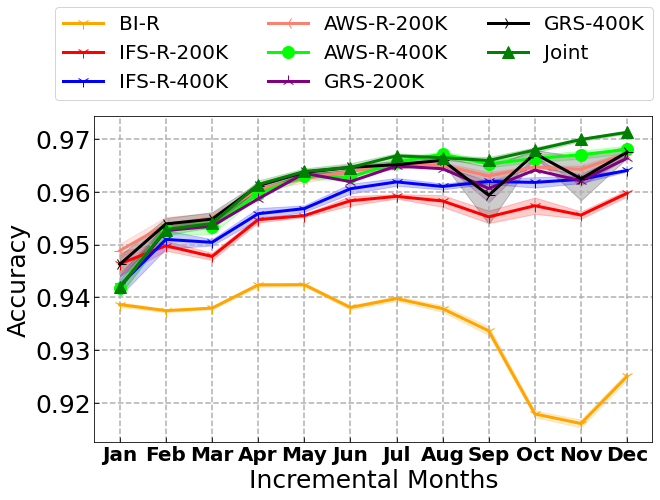

In [36]:
save_file = 'EMBER_Domain_Nov23.pdf'



# sns.set_context('poster')
# sns.set_style('white')
# sns.set_color_codes()
# palette = sns.color_palette("bright")

x_axis = np.array([i for i in range(12)])

plt.figure(figsize=(10, 6))




plt.fill_between(x_axis + [1], bir_acc-bir_sem, bir_acc+bir_sem, color='orange', alpha=0.2)
plt.plot(x_axis + [1],bir_acc, 'orange',marker= '1', markersize=12, linewidth=3.0, label='BI-R')



# ifs_150K_sem = [stats.sem(ifs_150K[i]) for i in range(len(ifs_150K))]
# ifs_150K_prec = [np.mean(ifs_150K[i]) for i in range(len(ifs_150K))]
# ifs_150K_prec, ifs_150K_sem = np.array(ifs_150K_prec), np.array(ifs_150K_sem)

# plt.fill_between(x_axis + [1], ifs_150K_prec-ifs_150K_sem, ifs_150K_prec+ifs_150K_sem, color='red', alpha=0.2)
# plt.plot(x_axis + [1],ifs_150K_prec, 'red',marker= '1', markersize=12, linewidth=3.0, label='IFS-R-150K')


ifs_200K_sem = [stats.sem(ifs_200K[i]) for i in range(len(ifs_200K))]
ifs_200K_prec = [np.mean(ifs_200K[i]) for i in range(len(ifs_200K))]
ifs_200K_prec, ifs_200K_sem = np.array(ifs_200K_prec), np.array(ifs_200K_sem)

plt.fill_between(x_axis + [1], ifs_200K_prec-ifs_200K_sem, ifs_200K_prec+ifs_200K_sem, color='red', alpha=0.2)
plt.plot(x_axis + [1],ifs_200K_prec, 'red',marker= '1', markersize=12, linewidth=3.0, label='IFS-R-200K')


ifs_400K_sem = [stats.sem(ifs_400K[i]) for i in range(len(ifs_400K))]
ifs_400K_prec = [np.mean(ifs_400K[i]) for i in range(len(ifs_400K))]
ifs_400K_prec, ifs_400K_sem = np.array(ifs_400K_prec), np.array(ifs_400K_sem)

plt.fill_between(x_axis + [1], ifs_400K_prec-ifs_400K_sem, ifs_400K_prec+ifs_400K_sem, color='blue', alpha=0.2)
plt.plot(x_axis + [1],ifs_400K_prec, 'blue',marker= '1', markersize=12, linewidth=3.0, label='IFS-R-400K')




# aws_100K_sem = [stats.sem(aws_100K[i]) for i in range(len(aws_100K))]
# aws_100K_prec = [np.mean(aws_100K[i]) for i in range(len(aws_100K))]
# aws_100K_prec, aws_100K_sem = np.array(aws_100K_prec), np.array(aws_100K_sem)

# plt.fill_between(x_axis + [1], aws_100K_prec-aws_100K_sem,\
#                  aws_100K_prec+aws_100K_sem, color='lime', alpha=0.2)
# plt.plot(x_axis + [1],aws_100K_prec, 'lime',marker= 'o', markersize=12, linewidth=3.0, label='AWS-R-100K')


# aws_150K_sem = [stats.sem(aws_150K[i]) for i in range(len(aws_150K))]
# aws_150K_prec = [np.mean(aws_150K[i]) for i in range(len(aws_150K))]
# aws_150K_prec, aws_150K_sem = np.array(aws_150K_prec), np.array(aws_150K_sem)

# plt.fill_between(x_axis + [1], aws_150K_prec-aws_150K_sem,\
#                  aws_150K_prec+aws_150K_sem, color='lime', alpha=0.2)
# plt.plot(x_axis + [1],aws_150K_prec, 'lime',marker= 'o', markersize=12, linewidth=3.0, label='AWS-R-150K')


aws_200K_sem = [stats.sem(aws_200K[i]) for i in range(len(aws_200K))]
aws_200K_prec = [np.mean(aws_200K[i]) for i in range(len(aws_200K))]
aws_200K_prec, aws_200K_sem = np.array(aws_200K_prec), np.array(aws_200K_sem)

plt.fill_between(x_axis + [1], aws_200K_prec-aws_200K_sem,\
                 aws_200K_prec+aws_200K_sem, color='salmon', alpha=0.2)
plt.plot(x_axis + [1],aws_200K_prec, 'salmon',marker= '3', markersize=12, linewidth=3.0, label='AWS-R-200K')


aws_400K_sem = [stats.sem(aws_400K[i]) for i in range(len(aws_400K))]
aws_400K_prec = [np.mean(aws_400K[i]) for i in range(len(aws_400K))]
aws_400K_prec, aws_400K_sem = np.array(aws_400K_prec), np.array(aws_400K_sem)

plt.fill_between(x_axis + [1], aws_400K_prec-aws_400K_sem,\
                 aws_400K_prec+aws_400K_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],aws_400K_prec, 'lime',marker= 'o', markersize=12, linewidth=3.0, label='AWS-R-400K')



# grs_150K_sem = [stats.sem(grs_150K[i]) for i in range(len(grs_150K))]
# grs_150K_prec = [np.mean(grs_150K[i]) for i in range(len(grs_150K))]
# grs_150K_prec, grs_150K_sem = np.array(grs_150K_prec), np.array(grs_150K_sem)

# plt.fill_between(x_axis + [1], grs_150K_prec-grs_150K_sem, grs_150K_prec+grs_150K_sem, color='black', alpha=0.2)
# plt.plot(x_axis + [1],grs_150K_prec, 'black',marker= '4', markersize=12, linewidth=3.0, label='GRS-150K')


grs_200K_sem = [stats.sem(grs_200K[i]) for i in range(len(grs_200K))]
grs_200K_prec = [np.mean(grs_200K[i]) for i in range(len(grs_200K))]
grs_200K_prec, grs_200K_sem = np.array(grs_200K_prec), np.array(grs_200K_sem)

plt.fill_between(x_axis + [1], grs_400K_prec-grs_200K_sem, grs_200K_prec+grs_200K_sem, color='purple', alpha=0.2)
plt.plot(x_axis + [1],grs_200K_prec, 'purple',marker= '2', markersize=12, linewidth=3.0, label='GRS-200K')



grs_400K_sem = [stats.sem(grs_400K[i]) for i in range(len(grs_400K))]
grs_400K_prec = [np.mean(grs_400K[i]) for i in range(len(grs_400K))]
grs_400K_prec, grs_400K_sem = np.array(grs_400K_prec), np.array(grs_400K_sem)

plt.fill_between(x_axis + [1], grs_400K_prec-grs_400K_sem, grs_400K_prec+grs_400K_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],grs_400K_prec, 'black',marker= '4', markersize=12, linewidth=3.0, label='GRS-400K')



grs_100_sem = [stats.sem(grs_joint[i]) for i in range(len(grs_joint))]
grs_100_prec = [np.mean(grs_joint[i]) for i in range(len(grs_joint))]
grs_100_prec, grs_100_sem = np.array(grs_100_prec), np.array(grs_100_sem)
plt.fill_between(x_axis + [1], grs_100_prec-grs_100_sem, grs_100_prec+grs_100_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],grs_100_prec, 'green',marker= '^', markersize=12, linewidth=3.0, label='Joint')


plt.legend(ncol=3, loc=(-0.071, 1.05), fontsize=20)


plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Incremental Months', fontsize=25)
plt.xticks([1, 2,3,4,5, 6, 7, 8, 9, 10, 11, 12],\
           ['Jan', 'Feb', 'Mar', 'Apr',\
          'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=20, fontweight ='bold') 
plt.yticks(fontsize=25)
plt.grid(True, linestyle='--', linewidth=1.5)

plt.savefig('./Figs_Nov23/' + save_file,
                bbox_inches='tight', dpi=300);

In [13]:

def get_results(replay_config, replay_portion, num_replay_sample=200):
    scenario = 'class'
    target_classes = 100
    
    results_dir = './EMBER_Class_Task/ember_results_cl/' + str(scenario) + '/' + str(target_classes) + '/'
    if replay_config == 'grs':
        result_file = str(replay_config)  + '_' + str(replay_portion) + '_results.txt'
    
    if replay_config == 'ifs' or replay_config == 'frs':
        result_file = str(replay_config)  + '_' + str(num_replay_sample) + '_results.txt'
        
        
    result_path = results_dir + result_file 
    
    
    res_all, res_mean, res_std, res_min = [], [], [], []

    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:

                res_float = []
                r_line = line.split('\t')[1].split(',')
                #print(r_line, type(r_line))
                r_line = list(r_line)
                #print(r_line)

                for i in r_line:
                    if '[' in i or ']' in i:
                        try: res = float(i.split('[')[1])
                        except: 
                            #print(i.split(']'))
                            res = float(i.split(']')[0])
                        res_float.append(res)
                    else:
                        res = float(i)
                        res_float.append(res)

                #print(res_float, np.mean(res_float)) 

                res_all.append(res_float), res_mean.append(np.mean(res_float)),\
                res_std.append(np.std(res_float)), res_min.append(min(res_float))

    res_all, res_mean, res_std, res_min = np.array(res_all), np.array(res_mean), np.array(res_std), np.array(res_min)


    all_mean, all_std = [], []
    all_task_res = []
    for i in range(res_all.shape[1]):
        task_res = []
        for j in range(res_all.shape[0]):
            task_res.append(res_all[j,i])
        #print(task_res)
        all_mean.append(np.mean(task_res))
        all_std.append(np.std(task_res))
        all_task_res.append(task_res)


    print(f'Mean {np.mean(res_mean)* 100} STD {np.mean(all_std)} Minimum {np.mean(res_min)* 100} Minimum STD {np.std(res_min)* 100}\n')

    return np.array(all_task_res), np.array(all_mean)




In [108]:
def MC_results(scenario, replay_config, 
                cnt_rate=0.1, anomaly_perct=0.5,
               replay_portion=1.0, num_replay_sample=500):

    target_classes = 100
    
    results_dir = './ICDM_Domain/'

    if replay_config == 'grs':
        result_file = str(replay_config)  + '_MC_' + str(replay_portion) + '_results.txt'
    else:
        result_file = str(replay_config)  + '_MC_' +\
                    str(num_replay_sample)  + '_results.txt'
    result_path = results_dir + result_file 
    print(result_path)
    
    Tr_Samples = []
    Tr_Times = []

    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:
                #print(line)
                infos = line.split('\t')
                task = infos[0]
                #print(int(task))
                num_sample, tr_time = float(infos[1]), float(infos[2])
                Tr_Samples.append(num_sample)
                Tr_Times.append(tr_time) 

    print()
    Tr_Samples, Tr_Times = np.array(Tr_Samples), np.array(Tr_Times)
    
    return Tr_Samples, Tr_Times*60


joint_S,joint_T = MC_results('domain', replay_config='grs', replay_portion=1.0)


GRS5_S, GRS5_T = MC_results('domain', replay_config='grs', replay_portion=.05)
GRS10_S, GRS10_T = MC_results('domain', replay_config='grs', replay_portion=.10)
GRS20_S, GRS20_T = MC_results('domain', replay_config='grs', replay_portion=.20)
GRS50_S, GRS50_T = MC_results('domain', replay_config='grs', replay_portion=.50)

IFS50_S, IFS50_T = MC_results('domain', replay_config='ifs', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=50)
IFS100_S, IFS100_T = MC_results('domain', replay_config='ifs', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=100)
IFS200_S, IFS200_T = MC_results('domain', replay_config='ifs', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=200)
IFS500_S, IFS500_T = MC_results('domain', replay_config='ifs', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=500)
IFS1K_S, IFS1K_T = MC_results('domain', replay_config='ifs', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=1000)
IFS3K_S, IFS3K_T = MC_results('domain', replay_config='ifs', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=3000)
IFS5K_S, IFS5K_T = MC_results('domain', replay_config='ifs', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=5000)

AWS50_S, AWS50_T = MC_results('domain', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=50)
AWS100_S, AWS100_T = MC_results('domain', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=100)
AWS200_S, AWS200_T = MC_results('domain', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=200)
AWS500_S, AWS500_T = MC_results('domain', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=500)
AWS1K_S, AWS1K_T = MC_results('domain', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=1000)
AWS3K_S, AWS3K_T = MC_results('domain', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=3000)
AWS5K_S, AWS5K_T = MC_results('domain', replay_config='aws', cnt_rate=0.1, anomaly_perct=0.5, num_replay_sample=5000)

./ICDM_Domain/grs_MC_1.0_results.txt

./ICDM_Domain/grs_MC_0.05_results.txt

./ICDM_Domain/grs_MC_0.1_results.txt

./ICDM_Domain/grs_MC_0.2_results.txt

./ICDM_Domain/grs_MC_0.5_results.txt

./ICDM_Domain/ifs_MC_50_results.txt

./ICDM_Domain/ifs_MC_100_results.txt

./ICDM_Domain/ifs_MC_200_results.txt

./ICDM_Domain/ifs_MC_500_results.txt

./ICDM_Domain/ifs_MC_1000_results.txt

./ICDM_Domain/ifs_MC_3000_results.txt

./ICDM_Domain/ifs_MC_5000_results.txt

./ICDM_Domain/aws_MC_50_results.txt

./ICDM_Domain/aws_MC_100_results.txt

./ICDM_Domain/aws_MC_200_results.txt

./ICDM_Domain/aws_MC_500_results.txt

./ICDM_Domain/aws_MC_1000_results.txt

./ICDM_Domain/aws_MC_3000_results.txt

./ICDM_Domain/aws_MC_5000_results.txt



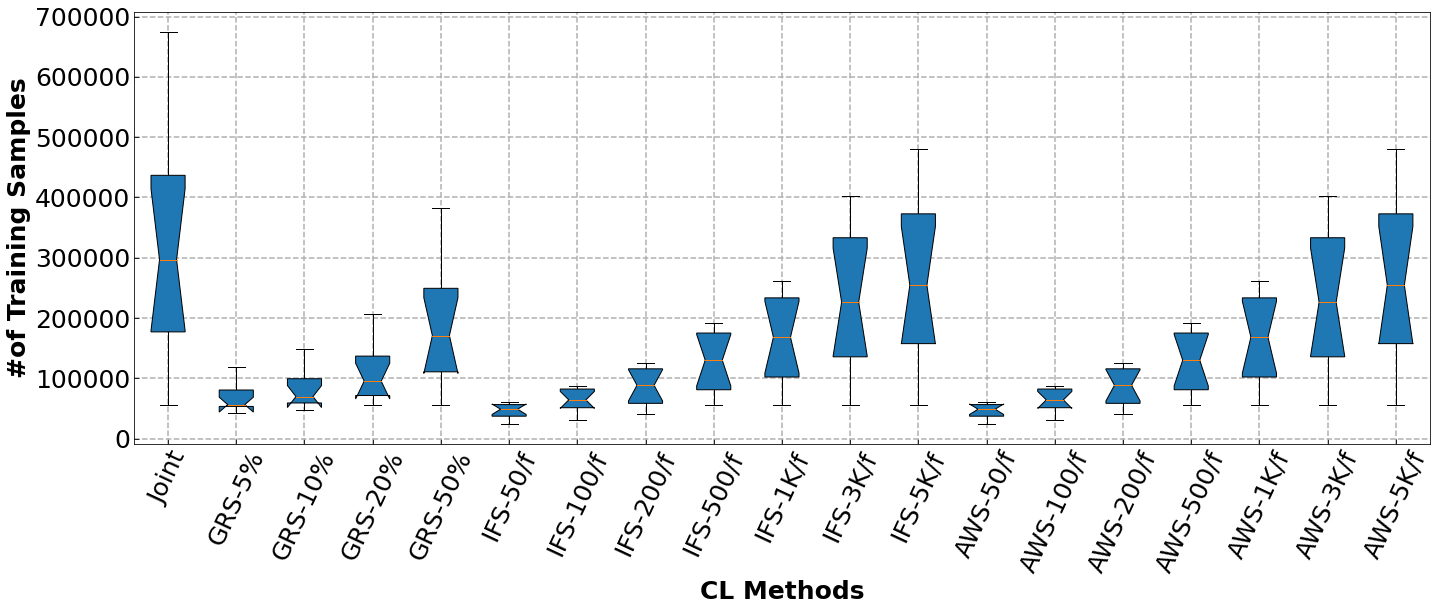

In [112]:
data = [joint_S, GRS5_S, GRS10_S, GRS20_S, GRS50_S,\
        IFS50_S, IFS100_S, IFS200_S, IFS500_S, IFS1K_S, IFS3K_S, IFS5K_S,\
        AWS50_S, AWS100_S, AWS200_S, AWS500_S, AWS1K_S, AWS3K_S, AWS5K_S]
 
fig = plt.figure(figsize =(18, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, notch='True', patch_artist=True, labels=['Joint',\
                               'GRS-5%','GRS-10%','GRS-20%', 'GRS-50%',\
                   'IFS-50/f','IFS-100/f','IFS-200/f','IFS-500/f','IFS-1K/f','IFS-3K/f','IFS-5K/f',\
                   'AWS-50/f', 'AWS-100/f', 'AWS-200/f', 'AWS-500/f', 'AWS-1K/f','AWS-3K/f','AWS-5K/f'],)
plt.xticks(rotation = 65, fontsize=25)
plt.ylabel('#of Training Samples', fontsize=25, fontweight ='bold')
plt.xlabel('CL Methods', fontsize=25, fontweight ='bold')
plt.yticks(fontsize=25)
plt.grid(True, linestyle='--', linewidth=1.5)


save_file = 'Training_Samples.pdf'
plt.savefig('../EMBER_Class_Task/ICDM_figs/' + save_file,
                bbox_inches='tight', dpi=300);

# show plot
plt.show()

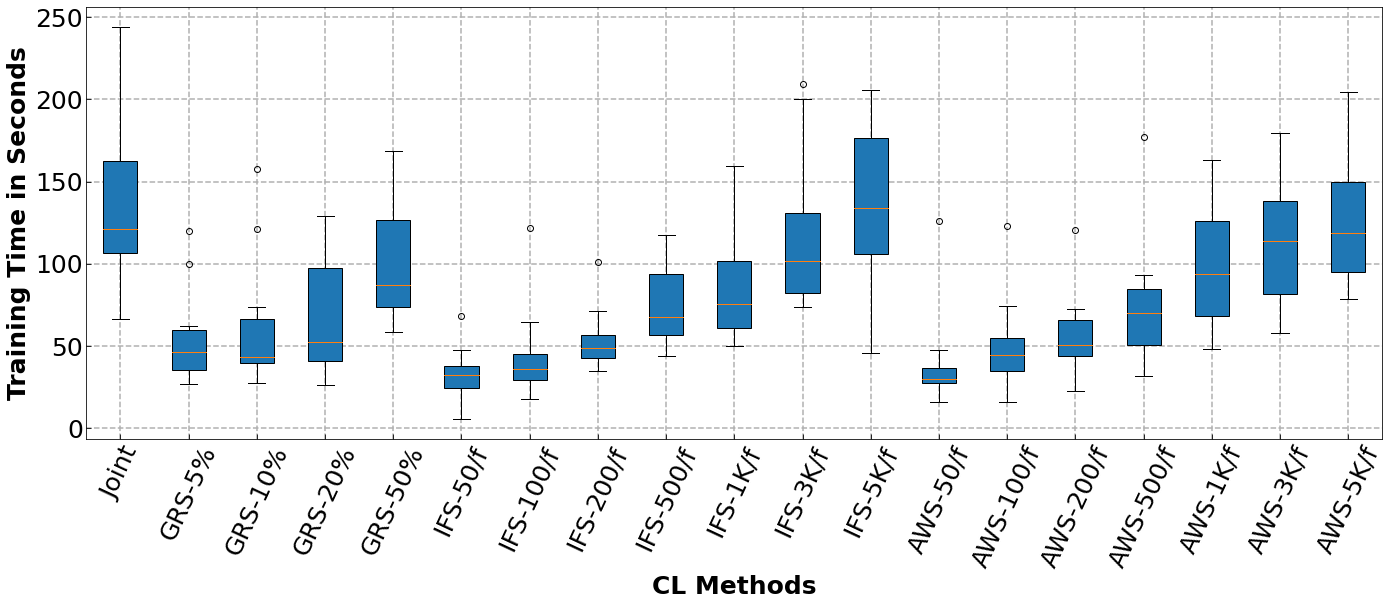

In [125]:
data = [joint_T, GRS5_T, GRS10_T, GRS20_T, GRS50_T,\
        IFS50_T, IFS100_T, IFS200_T, IFS500_T, IFS1K_T, IFS3K_T, IFS5K_T,\
        AWS50_T, AWS100_T, AWS200_T, AWS500_T, AWS1K_T, AWS3K_T, AWS5K_T]
 
 
fig = plt.figure(figsize =(18, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, patch_artist=True, labels=['Joint',\
                               'GRS-5%','GRS-10%','GRS-20%', 'GRS-50%',\
                   'IFS-50/f','IFS-100/f','IFS-200/f','IFS-500/f','IFS-1K/f','IFS-3K/f','IFS-5K/f',\
                   'AWS-50/f', 'AWS-100/f', 'AWS-200/f', 'AWS-500/f', 'AWS-1K/f','AWS-3K/f','AWS-5K/f'],)
plt.xticks(rotation = 65, fontsize=25)
plt.ylabel('Training Time in Seconds', fontsize=25, fontweight ='bold')
plt.xlabel('CL Methods', fontsize=25, fontweight ='bold')
plt.yticks(fontsize=25)
plt.grid(True, linestyle='--', linewidth=1.5)


save_file = 'Training_Time.pdf'
plt.savefig('../EMBER_Class_Task/ICDM_figs/' + save_file,
                bbox_inches='tight', dpi=300);

# show plot
plt.show()

In [145]:
def get_average_all_exps(result_dict, get_exps_min=False):
    
    multiexps = {}
    for k, runs in result_dict.items():
        #print(k)
        #for runs in precs_dict[k]:
        #print(runs)
        for ind, run in enumerate(runs):
            #print(run)
            try:
                if ind in multiexps.keys():
                    multiexps[ind].append(run)
                else:
                    multiexps[ind] = [run]
            except: continue


    exps_mean = []
    exps_min = []
    for exp in multiexps.keys():
        exps_mean.append(np.mean(multiexps[exp]))
        exps_min.append(np.min(multiexps[exp]))
        #print(np.mean(multiexps[exp]), np.std(multiexps[exp]))

    assert len(exps_mean) == len(exps_min)

    #print(f'Mean {np.mean(exps_mean)* 100:.2f}\u00B1{np.std(exps_mean)* 100:.2f}')
    #print(f'Min {np.mean(exps_min)* 100:.2f}\u00B1{np.std(exps_min)* 100:.2f}')
    
    if get_exps_min:
        return exps_mean, exps_min
    else:
        return exps_mean 
    
    
    
def IFS_New(scenario, replay_config, 
                cnt_rate=0.1, anomaly_perct=0.5,
               replay_portion=1.0, num_replay_sample=500):

    target_classes = 100
    
    results_dir = './ICDM_Domain/'

    if replay_config == 'grs':
        result_file = str(replay_config)  + '_' + str(replay_portion) + '_results.txt'
    else:
        result_file = str(replay_config)  + '_V11_' +\
                    str(num_replay_sample)  + '_results.txt'

        
    result_path = results_dir + result_file 
    print(result_path)
    
    accs_dict = {}
    precs_dict = {}
    recalls_dict = {}
    f1_dict = {}
    
    
    Tr_Samples = []
    Tr_Times = []
    
    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:
                #print(line)
                infos = line.split('\t')
                task = infos[0]
                #print(int(task))
                acc, prec, recal, f1, num_sample, tr_time =\
                                    float(infos[1]), float(infos[2]), float(infos[3]), float(infos[4]),\
                                     float(infos[5]),  float(infos[6])
                Tr_Samples.append(num_sample)
                Tr_Times.append(tr_time)
                
                if task in accs_dict.keys():
                    accs_dict[task].append(acc)
                    precs_dict[task].append(prec)
                    recalls_dict[task].append(recal)
                    f1_dict[task].append(f1)
                else:
                    accs_dict[task] = [acc]
                    precs_dict[task] = [prec]
                    recalls_dict[task] = [recal]
                    f1_dict[task] = [f1]

    

    print()
    Tr_Samples, Tr_Times = np.array(Tr_Samples), np.array(Tr_Times)
    
    #accs_all_task = []
    accs_all = get_average_all_exps(accs_dict, get_exps_min=False)
    precs_all, precs_all_min = get_average_all_exps(precs_dict, get_exps_min=True)
    
    recalls_all =get_average_all_exps(recalls_dict, get_exps_min=False)
    f1_all = get_average_all_exps(f1_dict, get_exps_min=False)
    
    
    precs_all_task = []
    f1_all_task = []
    for k, v in precs_dict.items():
        precs_all_task.append(v)
        f1_all_task.append(f1_dict[k])
        

    #print()
    if replay_config == 'grs':
            print(f'\t\t {str(replay_config)}-{str(replay_portion*100)}% w/ Contamination {cnt_rate*100} and Anomaly Perct {anomaly_perct*100}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    else:
        print(f'\t\t {str(replay_config)} w/ Contamination {cnt_rate*100} and Anomaly Perct {anomaly_perct*100}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    
    print()
    return  np.array(precs_all_task), np.array(accs_all), np.array(precs_all), np.array(recalls_all), np.array(f1_all_task), np.array(f1_all), Tr_Samples, Tr_Times*60


IFSN500, _, _, _, _, _, IFSN500_S, IFSN500_T = IFS_New('domain', replay_config='ifs', num_replay_sample=500)
IFSN1K, _, _, _, _, _, IFSN1K_S, IFSN1K_T = IFS_New('domain', replay_config='ifs', num_replay_sample=1000)
IFSN3K, _, _, _, _, _, IFSN3K_S, IFSN3K_T = IFS_New('domain', replay_config='ifs', num_replay_sample=3000);


./ICDM_Domain/ifs_V11_500_results.txt

		 ifs w/ Contamination 10.0 and Anomaly Perct 50.0
#################	###################	###################	###################
prec   94.36±0.28 	prec-min	93.90±0.45 	recall	 94.36±0.28 	f1	94.36±0.28 
#################	###################	###################	###################

./ICDM_Domain/ifs_V11_1000_results.txt

		 ifs w/ Contamination 10.0 and Anomaly Perct 50.0
#################	###################	###################	###################
prec   94.59±0.52 	prec-min	94.16±0.46 	recall	 94.59±0.52 	f1	94.59±0.52 
#################	###################	###################	###################

./ICDM_Domain/ifs_V11_3000_results.txt

		 ifs w/ Contamination 10.0 and Anomaly Perct 50.0
#################	###################	###################	###################
prec   95.92±0.00 	prec-min	94.23±0.00 	recall	 95.92±0.00 	f1	95.92±0.00 
#################	###################	###################	###################



/home/mr6564/anaconda/envs/PyTorch/lib/python3.7/site-packages/ipykernel_launcher.py:116: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [146]:
def get_average_all_exps(result_dict, get_exps_min=False):
    
    multiexps = {}
    for k, runs in result_dict.items():
        #print(k)
        #for runs in precs_dict[k]:
        #print(runs)
        for ind, run in enumerate(runs):
            #print(run)
            try:
                if ind in multiexps.keys():
                    multiexps[ind].append(run)
                else:
                    multiexps[ind] = [run]
            except: continue


    exps_mean = []
    exps_min = []
    for exp in multiexps.keys():
        exps_mean.append(np.mean(multiexps[exp]))
        exps_min.append(np.min(multiexps[exp]))
        #print(np.mean(multiexps[exp]), np.std(multiexps[exp]))

    assert len(exps_mean) == len(exps_min)

    #print(f'Mean {np.mean(exps_mean)* 100:.2f}\u00B1{np.std(exps_mean)* 100:.2f}')
    #print(f'Min {np.mean(exps_min)* 100:.2f}\u00B1{np.std(exps_min)* 100:.2f}')
    
    if get_exps_min:
        return exps_mean, exps_min
    else:
        return exps_mean 
    
    
    
def IFS_New(scenario, replay_config, 
                cnt_rate=0.1, anomaly_perct=0.5,
               replay_portion=1.0, num_replay_sample=500):

    target_classes = 100
    
    results_dir = './ICDM_Domain/'

    if replay_config == 'grs':
        result_file = str(replay_config)  + '_' + str(replay_portion) + '_results.txt'
    else:
        result_file = str(replay_config)  + '_V21_' +\
                    str(num_replay_sample)  + '_results.txt'

        
    result_path = results_dir + result_file 
    print(result_path)
    
    accs_dict = {}
    precs_dict = {}
    recalls_dict = {}
    f1_dict = {}
    
    
    Tr_Samples = []
    Tr_Times = []
    
    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:
                #print(line)
                infos = line.split('\t')
                task = infos[0]
                #print(int(task))
                acc, prec, recal, f1, num_sample, tr_time =\
                                    float(infos[1]), float(infos[2]), float(infos[3]), float(infos[4]),\
                                     float(infos[5]),  float(infos[6])
                Tr_Samples.append(num_sample)
                Tr_Times.append(tr_time)
                
                if task in accs_dict.keys():
                    accs_dict[task].append(acc)
                    precs_dict[task].append(prec)
                    recalls_dict[task].append(recal)
                    f1_dict[task].append(f1)
                else:
                    accs_dict[task] = [acc]
                    precs_dict[task] = [prec]
                    recalls_dict[task] = [recal]
                    f1_dict[task] = [f1]

    

    print()
    Tr_Samples, Tr_Times = np.array(Tr_Samples), np.array(Tr_Times)
    
    #accs_all_task = []
    accs_all = get_average_all_exps(accs_dict, get_exps_min=False)
    precs_all, precs_all_min = get_average_all_exps(precs_dict, get_exps_min=True)
    
    recalls_all =get_average_all_exps(recalls_dict, get_exps_min=False)
    f1_all = get_average_all_exps(f1_dict, get_exps_min=False)
    
    
    precs_all_task = []
    f1_all_task = []
    for k, v in precs_dict.items():
        precs_all_task.append(v)
        f1_all_task.append(f1_dict[k])
        

    #print()
    if replay_config == 'grs':
            print(f'\t\t {str(replay_config)}-{str(replay_portion*100)}% w/ Contamination {cnt_rate*100} and Anomaly Perct {anomaly_perct*100}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    else:
        print(f'\t\t {str(replay_config)} w/ Contamination {cnt_rate*100} and Anomaly Perct {anomaly_perct*100}\n#################\t###################\t###################\t###################\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f} \tprec-min\t{np.mean(precs_all_min)* 100:.2f}\u00B1{np.std(precs_all_min) * 100:.2f} \trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f} \tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f} \n#################\t###################\t###################\t###################')
    
    print()
    return  np.array(precs_all_task), np.array(accs_all), np.array(precs_all), np.array(recalls_all), np.array(f1_all_task), np.array(f1_all), Tr_Samples, Tr_Times*60


IFSNN1K, _, _, _, _, _, IFSNN1K_S, IFSNN1K_T = IFS_New('domain', replay_config='ifs', num_replay_sample=1000)


./ICDM_Domain/ifs_V21_1000_results.txt

		 ifs w/ Contamination 10.0 and Anomaly Perct 50.0
#################	###################	###################	###################
prec   94.75±0.26 	prec-min	94.16±0.38 	recall	 94.75±0.26 	f1	94.75±0.26 
#################	###################	###################	###################



/home/mr6564/anaconda/envs/PyTorch/lib/python3.7/site-packages/ipykernel_launcher.py:116: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


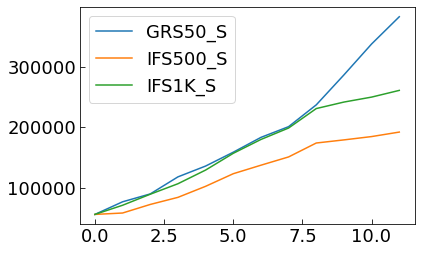

In [157]:
plt.plot(GRS50_S, label='GRS50_S')
plt.plot(IFS500_S, label='IFS500_S')
plt.plot(IFS1K_S, label='IFS1K_S')

plt.legend()

/home/mr6564/anaconda/envs/PyTorch/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


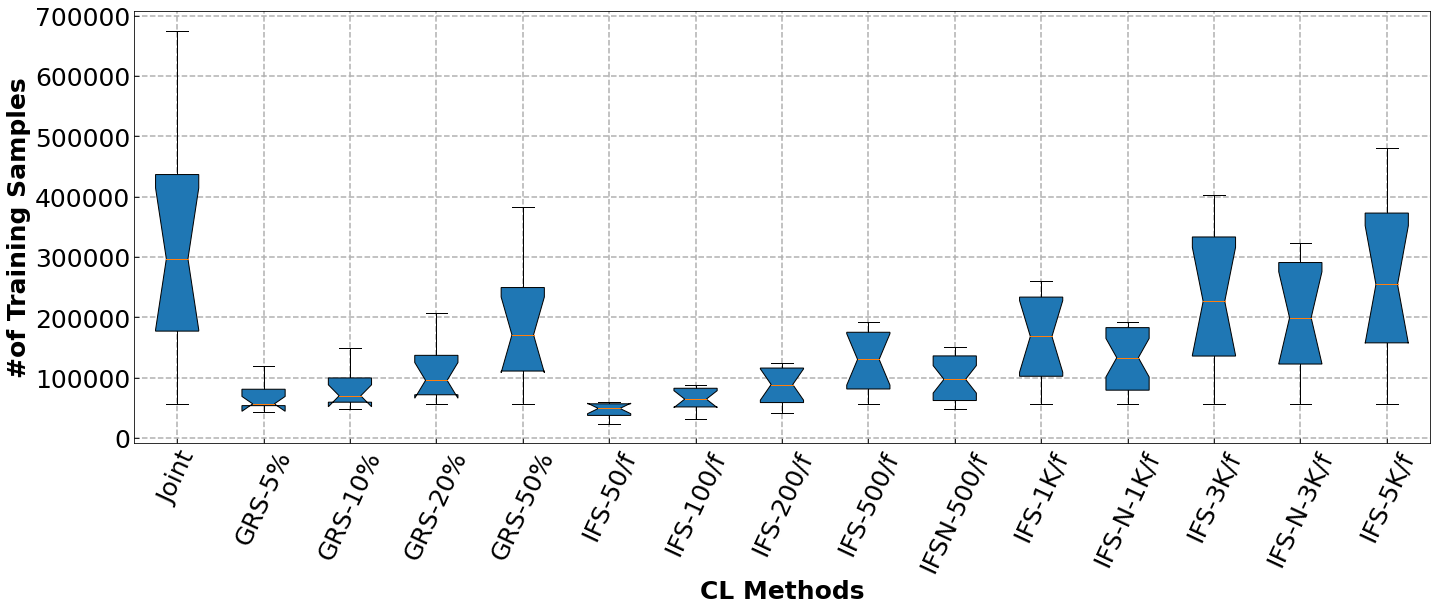

In [147]:
data = [joint_S, GRS5_S, GRS10_S, GRS20_S, GRS50_S,\
        IFS50_S, IFS100_S, IFS200_S, IFS500_S, IFSN500_S, IFS1K_S, IFSN1K_S, IFS3K_S, IFSN3K_S, IFS5K_S]
 
fig = plt.figure(figsize =(18, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, notch='True', patch_artist=True, labels=['Joint',\
                               'GRS-5%','GRS-10%','GRS-20%', 'GRS-50%',\
       'IFS-50/f','IFS-100/f','IFS-200/f','IFS-500/f', 'IFSN-500/f','IFS-1K/f', 'IFS-N-1K/f', 'IFS-3K/f', 'IFS-N-3K/f','IFS-5K/f'],)
plt.xticks(rotation = 65, fontsize=25)
plt.ylabel('#of Training Samples', fontsize=25, fontweight ='bold')
plt.xlabel('CL Methods', fontsize=25, fontweight ='bold')
plt.yticks(fontsize=25)
plt.grid(True, linestyle='--', linewidth=1.5)


save_file = 'V1_Domain_Training_Samples.pdf'
plt.savefig('../EMBER_Class_Task/ICDM_figs/' + save_file,
                bbox_inches='tight', dpi=300);

# show plot
plt.show()

In [14]:
scenario = 'class'
cl_methods = ['none', 'offline', 'ewc', 'ewc_online', 'si', 'lwf', 'gr', 'gr_distill',\
              'agem', 'experience_replay', 'rtf', 'icarl', 'bir']

# none_accs, none_mean = get_ember_data_for_plot(scenario, cl_methods[0])
# joint_accs, joint_mean = get_ember_data_for_plot(scenario, cl_methods[1])
# ewc_accs, ewc_mean = get_ember_data_for_plot(scenario, cl_methods[2])
# lwf_accs, lwf_mean = get_ember_data_for_plot(scenario, cl_methods[5])
# gr_accs, gr_mean = get_ember_data_for_plot(scenario, cl_methods[6])
icarl_accs, icarl_mean = get_ember_data_for_plot(scenario, cl_methods[11])
# bir_accs, bir_mean = get_ember_data_for_plot(scenario, cl_methods[12])

print()

grs100_accs, grs100_mean  = get_results('grs', '1.0', num_replay_sample=200)

grs20_accs, grs20_mean = get_results('grs', '0.2', num_replay_sample=200)

grs50_accs, grs50_mean = get_results('grs', '0.5', num_replay_sample=200)

frs200_accs, frs200_mean = get_results('frs', '0.', num_replay_sample=200)

frs500_accs, frs500_mean = get_results('frs', '0.', num_replay_sample=500)

NameError: name 'get_ember_data_for_plot' is not defined

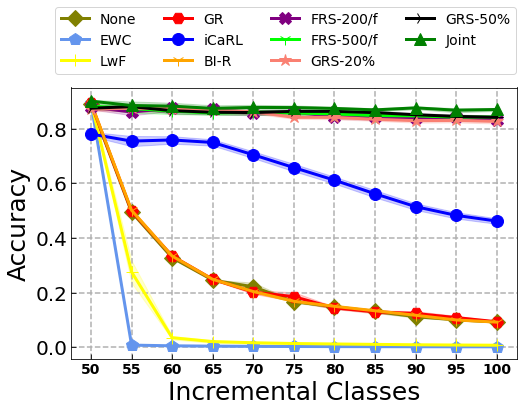

In [9]:
save_file_rocauc = 'ICDM23_Class.pdf'


x_axis = np.array([i for i in range(11)])

plt.figure(figsize=(8, 5))



none_sem = [stats.sem(none_accs[i]) for i in range(len(none_accs))]
plt.fill_between(x_axis + [1], none_mean-none_sem, none_mean+none_sem, color='olive', alpha=0.2)
plt.plot(x_axis + [1],none_mean, 'olive', marker= 'D', markersize=12, linewidth=3.0, label='None')


ewc_sem = [stats.sem(ewc_accs[i]) for i in range(len(ewc_accs))]
plt.fill_between(x_axis + [1], ewc_mean-ewc_sem, ewc_mean+ewc_sem, color='cornflowerblue', alpha=0.2)
plt.plot(x_axis + [1],ewc_mean, 'cornflowerblue',marker= 'p', markersize=12, linewidth=3.0, label='EWC')

lwf_sem = [stats.sem(lwf_accs[i]) for i in range(len(lwf_accs))]
plt.fill_between(x_axis + [1], lwf_mean-lwf_sem, lwf_mean+lwf_sem, color='yellow', alpha=0.2)
plt.plot(x_axis + [1],lwf_mean, 'yellow',marker= '+', markersize=12, linewidth=3.0, label='LwF')


gr_sem = [stats.sem(gr_accs[i]) for i in range(len(gr_accs))]
plt.fill_between(x_axis + [1], gr_mean-gr_sem, gr_mean+gr_sem, color='red', alpha=0.2)
plt.plot(x_axis + [1],gr_mean, 'red',marker= 'H', markersize=12, linewidth=3.0, label='GR')


icarl_sem = [stats.sem(icarl_accs[i]) for i in range(len(icarl_accs))]
plt.fill_between(x_axis + [1], icarl_mean-icarl_sem, icarl_mean+icarl_sem, color='blue', alpha=0.2)
plt.plot(x_axis + [1], icarl_mean, 'blue',marker= 'o', markersize=12, linewidth=3.0, label='iCaRL')


bir_sem = [stats.sem(bir_accs[i]) for i in range(len(bir_accs))]
plt.fill_between(x_axis + [1], bir_mean-bir_sem, bir_mean+bir_sem, color='orange', alpha=0.2)
plt.plot(x_axis + [1],bir_mean, 'orange',marker= '1', markersize=12, linewidth=3.0, label='BI-R')


# twohundred_sem = [stats.sem(twohundred_acc[i]) for i in range(len(twohundred_acc))]
# plt.fill_between(x_axis + [1], twohundred_acc_mean-twohundred_sem,\
#                  twohundred_acc_mean+twohundred_sem, color='purple', alpha=0.2)
# plt.plot(x_axis + [1],twohundred_acc_mean, 'purple',marker= 'X',\
#          markersize=12, linewidth=3.0, label='FRS-200/f')


# fivehundred_sem = [stats.sem(fivehundred_acc[i]) for i in range(len(fivehundred_acc))]
# plt.fill_between(x_axis + [1], fivehundred_acc_mean-fivehundred_sem,\
#                  fivehundred_acc_mean+fivehundred_sem, color='lime', alpha=0.2)
# plt.plot(x_axis + [1],fivehundred_acc_mean, 'lime',marker= 'o', markersize=12, linewidth=3.0, label='FRS-500/f')



frs200_sem = [stats.sem(frs200_accs[i]) for i in range(len(frs200_accs))]
plt.fill_between(x_axis + [1], frs200_mean-frs200_sem,\
                 frs200_mean+frs200_sem, color='purple', alpha=0.2)
plt.plot(x_axis + [1],frs200_mean, 'purple',marker= 'X',\
         markersize=12, linewidth=3.0, label='FRS-200/f')


frs500_sem = [stats.sem(frs500_accs[i]) for i in range(len(frs500_accs))]
plt.fill_between(x_axis + [1], frs500_mean-frs500_sem, frs500_mean+frs500_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],frs500_mean, 'lime',marker= '1', markersize=12, linewidth=3.0, label='FRS-500/f')



grs20_sem = [stats.sem(grs20_accs[i]) for i in range(len(grs20_accs))]
plt.fill_between(x_axis + [1], grs20_mean-grs20_sem, grs20_mean+grs20_sem, color='salmon', alpha=0.2)
plt.plot(x_axis + [1],grs20_mean, 'salmon',marker= '*', markersize=12, linewidth=3.0, label='GRS-20%')


grs50_sem = [stats.sem(grs50_accs[i]) for i in range(len(grs50_accs))]
plt.fill_between(x_axis + [1], grs50_mean-grs50_sem, grs50_mean+grs50_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],grs50_mean, 'black',marker= '4', markersize=12, linewidth=3.0, label='GRS-50%')



joint_sem = [stats.sem(joint_accs[i]) for i in range(len(joint_accs))]
plt.fill_between(x_axis + [1], joint_mean-joint_sem, joint_mean+joint_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],joint_mean, 'green',marker= '^', markersize=12, linewidth=3.0, label='Joint')



plt.legend(ncol=4, loc=(-0.035, 1.05), fontsize=14)


plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Incremental Classes', fontsize=25)
plt.xticks([1,2,3,4,5,6, 7, 8, 9, 10, 11],\
           ['50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100'],\
           fontsize=14, fontweight ='bold')
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', linewidth=1.5)

# plt.savefig('./figs_proposal/' + save_file_rocauc,
#                 bbox_inches='tight', dpi=300);